In [ ]:
!pip install emoji
!pip install transformers

     |████████████████████████████████| 133kB 9.6MB/s 
     |████████████████████████████████| 2.5MB 8.2MB/s 
     |████████████████████████████████| 901kB 37.5MB/s 
     |████████████████████████████████| 3.3MB 34.8MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Thư viện

In [ ]:
from numpy import mean
from numpy import std
import emoji
from sklearn.naive_bayes import ComplementNB
import seaborn as sb
from gensim.models import KeyedVectors

import keras
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from keras.utils.np_utils import to_categorical
from sklearn.multioutput import MultiOutputClassifier
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Dense, Flatten, Dropout, LSTM, Bidirectional, GRU
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from keras.models import load_model
from joblib import dump
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Đọc dữ liệu

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Tail/APD_train_tail.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Tail/APD_dev_tail.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/APD_data/Tail/APD_test_tail.csv')

df_train.head(10)

,text,polarity
0,Giá 53k size vừa. đồ uống giá tiền,1
1,Giá 53k size vừa. đồ uống loại,1
2,Nhưng nói chung cũng hơi đắt. nhà hàng giá tiền,0
3,Mình ăn rất hôi mùi dầu. thức ăn chất lượng,0
4,Mình ăn chưa baoh thấy mùi hôi hải sản. thức ă...,2
5,3 dĩa vs 2 lon Revive mà có 190k thui(. nhà hà...,2
6,Ở đây ngay khu vắng nên khách cũng không đông ...,1
7,"Quán đông lắm, gọi món phải đợi hơi lâu, ko bi...",2
8,"Quán đông lắm, gọi món phải đợi hơi lâu, ko bi...",0
9,"Mình uống trà sữa lài hạnh nhân khá thơm nha, ...",2


# X và y

In [ ]:
X_train = df_train['text'].values
X_dev = df_dev['text'].values
X_test = df_test['text'].values

y_train = df_train['polarity'].values
y_dev = df_dev['polarity'].values
y_test = df_test['polarity'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


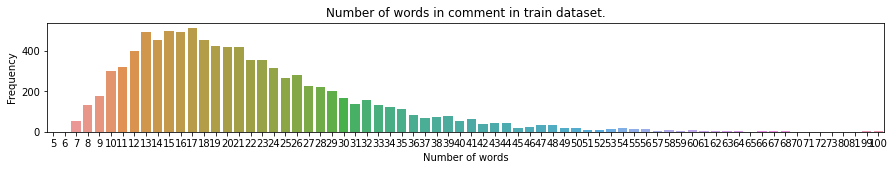

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


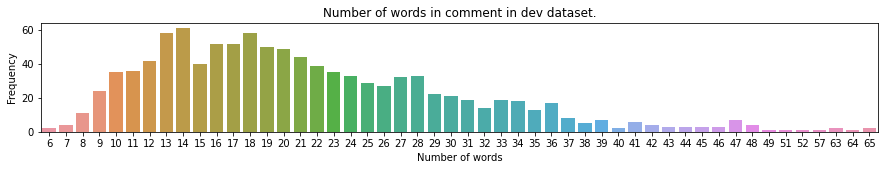

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


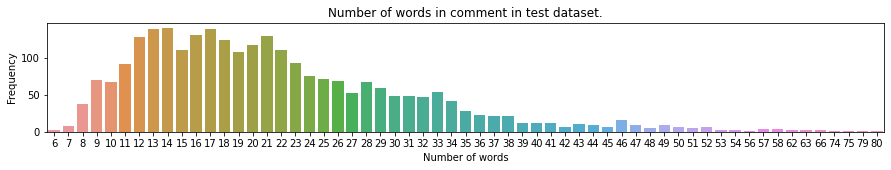

In [ ]:
# Độ dài cmt
def plot_number_word(X, name):
    l = []
    for i in range(len(X)):
        l.append(len(X[i].split()))
    plt.figure(figsize = (15, 2))
    sb.countplot(l)
    plt.title("Number of words in comment in " + name + ' dataset.')
    plt.xlabel("Number of words")
    plt.ylabel("Frequency")
    plt.show()

plot_number_word(X_train, 'train')
plot_number_word(X_dev, 'dev')
plot_number_word(X_test, 'test')

# ================================================================

In [ ]:
model_name = ["Native Bayes",
              "Logistic Regression",
              "SVM",
              "Text-CNN-fastText",
              "Text-CNN-Wikipedia Word2vec",
              "Text-CNN-BPEmb",
              "Text-CNN-MULTI_WC_F_E_B",
              "Bi-GRU-fastText",
              "Bi-GRU-Wikipedia Word2vec",
              "Bi-GRU-BPEmb",
              "Bi-GRU-MULTI_WC_F_E_B",
              "BERT XLM-R",
              "BERT MULTILINGUAL"
              "FPTAI (cased)",
              "PhoBERT"]

# Model---Naive Bayes

Accuracy train:  0.8618101078452104
Accuracy dev:  0.6172839506172839
Accuracy test:  0.6382655001901864
F1 macro test:  0.4141162814636221
Recall macro test:  0.4288050853508092
Precision macro test:  0.7920727093140886
F1 micro test:  0.6382655001901864
Recall micro test:  0.6382655001901864
Precision micro test:  0.6382655001901864


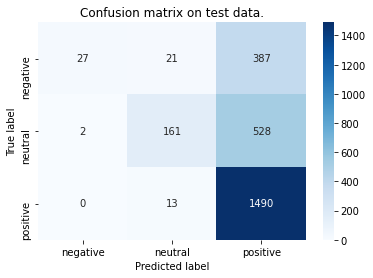

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = ComplementNB()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
        xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[0]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
            
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = True)

# Model---Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy train:  0.8679424825544513
Accuracy dev:  0.7027540360873694
Accuracy test:  0.7257512362114873
F1 macro test:  0.6441525953772693
Recall macro test:  0.6194393233040326
Precision macro test:  0.6984534500989147
F1 micro test:  0.7257512362114874
Recall micro test:  0.7257512362114873
Precision micro test:  0.7257512362114873


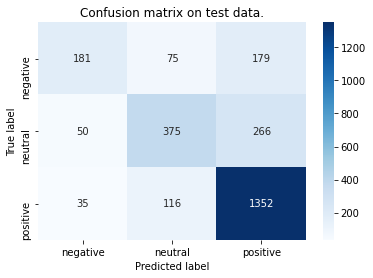

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = LogisticRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)

print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[1]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---SVM

Accuracy train:  0.9103404525269613
Accuracy dev:  0.6942070275403609
Accuracy test:  0.7177634081399772
F1 macro test:  0.618169790757083
Recall macro test:  0.5865329805814126
Precision macro test:  0.727772119786113
F1 micro test:  0.7177634081399772
Recall micro test:  0.7177634081399772
Precision micro test:  0.7177634081399772


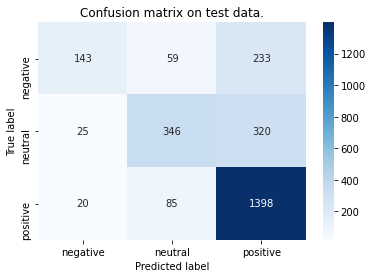

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = SVC()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[2]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# ========================================================

# Model---Text-CNN---FastText

Epoch 1/10
37/37 [==============================] - 45s 60ms/step - loss: 0.5870 - accuracy: 0.5314 - val_loss: 0.5070 - val_accuracy: 0.6106
Epoch 2/10
37/37 [==============================] - 1s 29ms/step - loss: 0.4450 - accuracy: 0.6846 - val_loss: 0.4097 - val_accuracy: 0.7113
Epoch 3/10
37/37 [==============================] - 1s 29ms/step - loss: 0.3463 - accuracy: 0.7740 - val_loss: 0.3733 - val_accuracy: 0.7445
Epoch 4/10
37/37 [==============================] - 1s 32ms/step - loss: 0.2691 - accuracy: 0.8401 - val_loss: 0.3658 - val_accuracy: 0.7512
Epoch 5/10
37/37 [==============================] - 1s 32ms/step - loss: 0.2221 - accuracy: 0.8744 - val_loss: 0.3736 - val_accuracy: 0.7540
Epoch 6/10
37/37 [==============================] - 1s 33ms/step - loss: 0.1757 - accuracy: 0.9086 - val_loss: 0.3837 - val_accuracy: 0.7569
Epoch 7/10
37/37 [==============================] - 1s 33ms/step - loss: 0.1411 - accuracy: 0.9294 - val_loss: 0.3994 - val_accuracy: 0.7512
Epoch 8/10
3

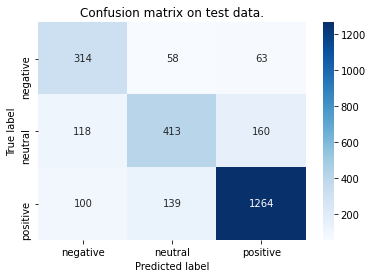

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[3]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---Wikipedia Word2vec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
37/37 [==============================] - 3s 51ms/step - loss: 0.8376 - accuracy: 0.5297 - val_loss: 0.4880 - val_accuracy: 0.6496
Epoch 2/10
37/37 [==============================] - 1s 36ms/step - loss: 0.4169 - accuracy: 0.7256 - val_loss: 0.4267 - val_accuracy: 0.6914
Epoch 3/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3376 - accuracy: 0.7888 - val_loss: 0.4076 - val_accuracy: 0.7113
Epoch 4/10
37/37 [==============================] - 1s 37ms/step - loss: 0.2814 - accuracy: 0.8431 - val_loss: 0.4116 - val_accuracy: 0.7189
Epoch 5/10
37/37 [==============================] - 1s 36ms/step - loss: 0.2375 - accuracy: 0.8732 - val_loss: 0.4047 - val_accuracy: 0.7265
Epoch 6/10
37/37 [==============================] - 1s 38ms/step - loss: 0.1920 - accuracy: 0.9072 - val_loss: 0.4118 - val_accuracy: 0.7265
Epoch 7/10
37/37 [==============================] - 1s 39ms/step - loss: 0.1591 - accuracy: 0.9344 - val_loss: 0.4335 - val_accuracy: 0.7142
Epoch 8/10
37

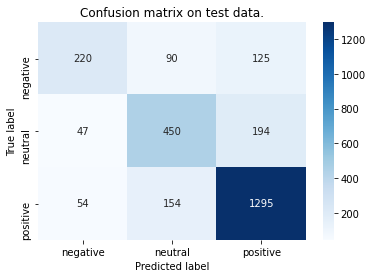

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict
def create_embedding_matrix(model_filepath, word2id):

    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[4]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---BPEmb

     |████████████████████████████████| 1.2MB 42.7MB/s 
downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.model


100%|██████████| 3659179/3659179 [00:00<00:00, 5789198.39B/s]


downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.d300.w2v.bin.tar.gz


100%|██████████| 223674818/223674818 [00:09<00:00, 23036201.61B/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
37/37 [==============================] - 2s 42ms/step - loss: 0.5873 - accuracy: 0.5478 - val_loss: 0.4846 - val_accuracy: 0.6382
Epoch 2/10
37/37 [==============================] - 1s 35ms/step - loss: 0.4358 - accuracy: 0.6881 - val_loss: 0.4250 - val_accuracy: 0.6828
Epoch 3/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3512 - accuracy: 0.7704 - val_loss: 0.3874 - val_accuracy: 0.7360
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.2831 - accuracy: 0.8345 - val_loss: 0.3741 - val_accuracy: 0.7436
Epoch 5/10
37/37 [==============================] - 1s 35ms/step - loss: 0.2274 - accuracy: 0.8818 - val_loss: 0.3810 - val_accuracy: 0.7521
Epoch 6/10
37/37 [==============================] - 1s 36ms/step - loss: 0.1811 - accuracy: 0.9156 - val_loss: 0.3866 - val_accuracy: 0.7588
Epoch 7/10
37/37 [==============================] - 1s 35ms/step - loss: 0.1430 - accuracy: 0.9362 - val_loss: 0.4200 - val_accuracy: 0.7445
Epoch 8/10
37

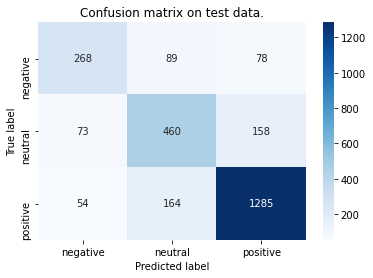

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]
    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors
    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[5]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Text-CNN---MULTI_WC_F_E_B

Epoch 1/10
37/37 [==============================] - 2s 41ms/step - loss: 0.6005 - accuracy: 0.5509 - val_loss: 0.5217 - val_accuracy: 0.6087
Epoch 2/10
37/37 [==============================] - 1s 35ms/step - loss: 0.4753 - accuracy: 0.6491 - val_loss: 0.4126 - val_accuracy: 0.7142
Epoch 3/10
37/37 [==============================] - 1s 35ms/step - loss: 0.3567 - accuracy: 0.7605 - val_loss: 0.3764 - val_accuracy: 0.7493
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.2773 - accuracy: 0.8269 - val_loss: 0.3625 - val_accuracy: 0.7597
Epoch 5/10
37/37 [==============================] - 1s 36ms/step - loss: 0.2218 - accuracy: 0.8733 - val_loss: 0.3776 - val_accuracy: 0.7521
Epoch 6/10
37/37 [==============================] - 1s 37ms/step - loss: 0.1769 - accuracy: 0.9060 - val_loss: 0.3884 - val_accuracy: 0.7569
Epoch 7/10
37/37 [==============================] - 1s 37ms/step - loss: 0.1408 - accuracy: 0.9318 - val_loss: 0.4112 - val_accuracy: 0.7521
Epoch 8/10
37

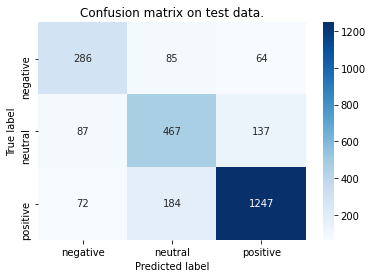

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[6]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# =============================================

# Model---Bi-GRU---FastText

Epoch 1/10
37/37 [==============================] - 11s 61ms/step - loss: 0.6150 - accuracy: 0.5450 - val_loss: 0.5442 - val_accuracy: 0.5641
Epoch 2/10
37/37 [==============================] - 1s 37ms/step - loss: 0.5099 - accuracy: 0.5996 - val_loss: 0.4202 - val_accuracy: 0.7018
Epoch 3/10
37/37 [==============================] - 1s 38ms/step - loss: 0.3752 - accuracy: 0.7472 - val_loss: 0.3884 - val_accuracy: 0.7331
Epoch 4/10
37/37 [==============================] - 1s 37ms/step - loss: 0.3232 - accuracy: 0.7868 - val_loss: 0.3753 - val_accuracy: 0.7607
Epoch 5/10
37/37 [==============================] - 1s 37ms/step - loss: 0.2768 - accuracy: 0.8238 - val_loss: 0.3815 - val_accuracy: 0.7426
Epoch 6/10
37/37 [==============================] - 1s 37ms/step - loss: 0.2404 - accuracy: 0.8536 - val_loss: 0.3780 - val_accuracy: 0.7445
Epoch 7/10
37/37 [==============================] - 1s 37ms/step - loss: 0.2122 - accuracy: 0.8727 - val_loss: 0.4055 - val_accuracy: 0.7436
Epoch 8/10
3

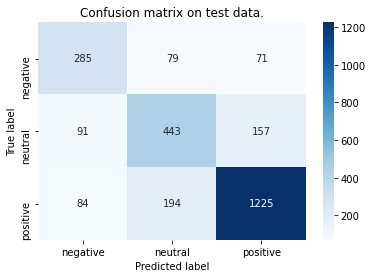

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[7]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---Wikipedia Word2vec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
37/37 [==============================] - 6s 70ms/step - loss: 0.6388 - accuracy: 0.4831 - val_loss: 0.5376 - val_accuracy: 0.5689
Epoch 2/10
37/37 [==============================] - 2s 43ms/step - loss: 0.5130 - accuracy: 0.6045 - val_loss: 0.4452 - val_accuracy: 0.6866
Epoch 3/10
37/37 [==============================] - 2s 43ms/step - loss: 0.4216 - accuracy: 0.7066 - val_loss: 0.4150 - val_accuracy: 0.7066
Epoch 4/10
37/37 [==============================] - 2s 42ms/step - loss: 0.3737 - accuracy: 0.7417 - val_loss: 0.3956 - val_accuracy: 0.7369
Epoch 5/10
37/37 [==============================] - 2s 43ms/step - loss: 0.3375 - accuracy: 0.7770 - val_loss: 0.3949 - val_accuracy: 0.7369
Epoch 6/10
37/37 [==============================] - 2s 43ms/step - loss: 0.3086 - accuracy: 0.7963 - val_loss: 0.3840 - val_accuracy: 0.7512
Epoch 7/10
37/37 [==============================] - 2s 44ms/step - loss: 0.2750 - accuracy: 0.8214 - val_loss: 0.3991 - val_accuracy: 0.7379
Epoch 8/10
37

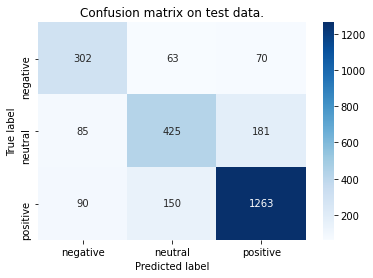

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[8]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---BPEmb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
37/37 [==============================] - 5s 60ms/step - loss: 0.5950 - accuracy: 0.5546 - val_loss: 0.5322 - val_accuracy: 0.5964
Epoch 2/10
37/37 [==============================] - 1s 36ms/step - loss: 0.5036 - accuracy: 0.6246 - val_loss: 0.4490 - val_accuracy: 0.6562
Epoch 3/10
37/37 [==============================] - 1s 36ms/step - loss: 0.4210 - accuracy: 0.6984 - val_loss: 0.3979 - val_accuracy: 0.7189
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3590 - accuracy: 0.7610 - val_loss: 0.3728 - val_accuracy: 0.7464
Epoch 5/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3091 - accuracy: 0.7976 - val_loss: 0.3663 - val_accuracy: 0.7540
Epoch 6/10
37/37 [==============================] - 1s 35ms/step - loss: 0.2716 - accuracy: 0.8234 - val_loss: 0.3659 - val_accuracy: 0.7578
Epoch 7/10
37/37 [==============================] - 1s 35ms/step - loss: 0.2351 - accuracy: 0.8511 - val_loss: 0.3762 - val_accuracy: 0.7578
Epoch 8/10
37

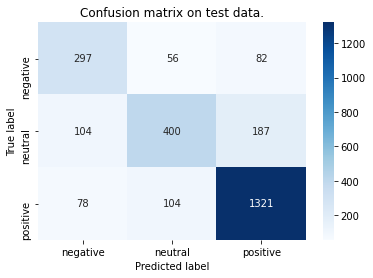

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    """
    Get the embedding matrix of the word2vec model
    :param model_filepath: the file path to the pre-build word2vec model
    :param word2id: the directory mapping from word to id
    :return: the embedding matrix of the word2vec model
    """
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[9]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# Model---Bi-GRU---MULTI_WC_F_E_B

Epoch 1/10
37/37 [==============================] - 5s 62ms/step - loss: 0.6346 - accuracy: 0.5282 - val_loss: 0.5576 - val_accuracy: 0.5499
Epoch 2/10
37/37 [==============================] - 1s 39ms/step - loss: 0.5300 - accuracy: 0.5807 - val_loss: 0.4377 - val_accuracy: 0.6733
Epoch 3/10
37/37 [==============================] - 1s 39ms/step - loss: 0.3921 - accuracy: 0.7260 - val_loss: 0.3779 - val_accuracy: 0.7407
Epoch 4/10
37/37 [==============================] - 1s 39ms/step - loss: 0.3299 - accuracy: 0.7862 - val_loss: 0.3610 - val_accuracy: 0.7540
Epoch 5/10
37/37 [==============================] - 1s 39ms/step - loss: 0.2751 - accuracy: 0.8280 - val_loss: 0.3705 - val_accuracy: 0.7588
Epoch 6/10
37/37 [==============================] - 1s 38ms/step - loss: 0.2361 - accuracy: 0.8557 - val_loss: 0.3817 - val_accuracy: 0.7426
Epoch 7/10
37/37 [==============================] - 1s 38ms/step - loss: 0.2031 - accuracy: 0.8781 - val_loss: 0.4095 - val_accuracy: 0.7436
Epoch 8/10
37

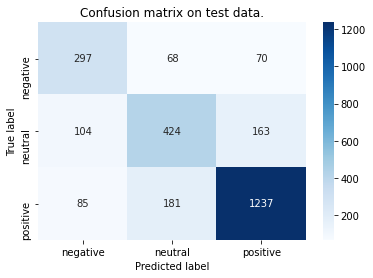

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating = "pre",padding = "pre")
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating = "pre",padding = "pre")
x_test = pad_sequences(x_test, maxlen = maxlen, truncating = "pre",padding = "pre")

num_label = 3
epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_label, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, to_categorical(y_train, num_classes = num_label), verbose=1, epochs=epochs,
          batch_size = batch_size, validation_data = (x_dev, to_categorical(y_dev, num_classes = num_label)))

y_train_pred = model.predict(x_train).argmax(axis = -1)
y_dev_pred = model.predict(x_dev).argmax(axis = -1)
y_test_pred = model.predict(x_test).argmax(axis = -1)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
cm = confusion_matrix(y_test, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu record
df = pd.DataFrame({"Model": [model_name[10]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# =========================================================

# BERT XLM-R

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

***** Running training *****
  Num examples = 9458
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2072


Step,Training Loss
500,0.782800


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin


Step,Training Loss
500,0.782800
1000,0.517400
1500,0.338000
2000,0.178600


Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 9458
  Batch size = 16


***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9761048847536477
Accuracy dev:  0.8347578347578347
Accuracy test:  0.8352985926207683
F1 macro test:  0.8066286620149116
Recall macro test:  0.8079142190802896
Precision macro test:  0.8057793177379672
F1 micro test:  0.8352985926207683
Recall micro test:  0.8352985926207683
Precision micro test:  0.8352985926207683


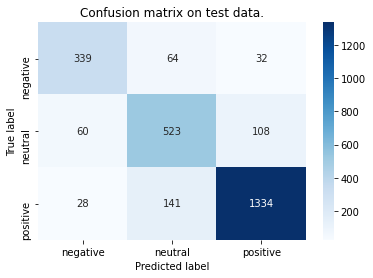

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Tail'
result.to_csv(path + '/' + 'xlm-r.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[11]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# BERT MULTILINGUAL

Accuracy train:  0.9793825333051385
Accuracy dev:  0.7901234567901234
Accuracy test:  0.7828071510079878
F1 macro test:  0.756044214983739
Recall macro test:  0.7729016021331038
Precision macro test:  0.7446721234525221
F1 micro test:  0.7828071510079878
Recall micro test:  0.7828071510079878
Precision micro test:  0.7828071510079878


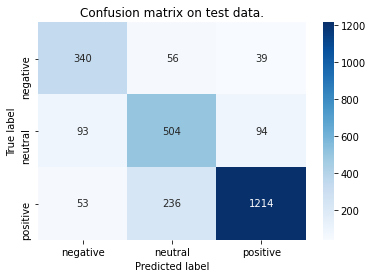

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Tail'
result.to_csv(path + '/' + 'bert-multi.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[12]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = "a")

# BERT FPTAI/vibert-base-cased



https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpwa_dghbm


storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
creating metadata file for /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
loading configuration file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
Model config BertConfig {
  "_num_labels": 2,
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    

storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
creating metadata file for /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
loading weights file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a


Some weights of the model checkpoint at FPTAI/vibert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
creating metadata file for /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/tokenizer.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resol

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 9458
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4144


Step,Training Loss
500,0.860100
1000,0.632300
1500,0.489100
2000,0.369000
2500,0.262000
3000,0.193900
3500,0.131800
4000,0.075400


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9927045887079721
Accuracy dev:  0.7872744539411206
Accuracy test:  0.7831875237732978
F1 macro test:  0.7435035932941462
Recall macro test:  0.7397178008981399
Precision macro test:  0.7508363922354077
F1 micro test:  0.7831875237732978
Recall micro test:  0.7831875237732978
Precision micro test:  0.7831875237732978


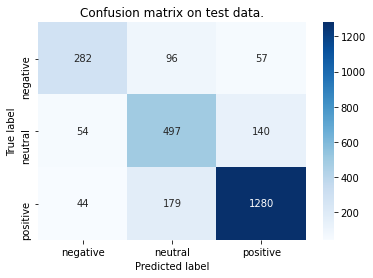

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('FPTAI/vibert-base-cased', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('FPTAI/vibert-base-cased')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Tail'
result.to_csv(path + '/' + 'vibert-base-cased.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[12]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')

# BERT vinai/phobert-base

     |████████████████████████████████| 2.7MB 36.0MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp37-none-any.whl size=2645952 sha256=76eb640e16d89321fd4d13fc122b753f02fcc5d2ef3610b21f3052eca1a698b3
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 1), reused 41 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


https://huggingface.co/vinai/phobert-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp1ctglpjw


storing https://huggingface.co/vinai/phobert-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
creating metadata file for /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
loading configuration file https://huggingface.co/vinai/phobert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  

storing https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
creating metadata file for /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
loading weights file https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

storing https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
creating metadata file for /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp0ybhh7wv


storing https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes in cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
creating metadata file for /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd


loading file https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
loading file https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes from cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
loading file https://huggingface.co/vinai/phobert-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/tokenizer_config.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/tokenizer.json from cache at None
Adding <mask> to the vocabulary
Special tokens have b

Step,Training Loss
500,0.763800
1000,0.511800
1500,0.388200
2000,0.287600
2500,0.202500
3000,0.152500
3500,0.100000
4000,0.064800


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

***** Running Prediction *****
  Num examples = 1053
  Batch size = 16
***** Running Prediction *****
  Num examples = 2629
  Batch size = 16


Accuracy train:  0.9941848170860647
Accuracy dev:  0.8442545109211775
Accuracy test:  0.8535564853556485
F1 macro test:  0.8258345868970625
Recall macro test:  0.8256148813207459
Precision macro test:  0.8260675832969592
F1 micro test:  0.8535564853556485
Recall micro test:  0.8535564853556485
Precision micro test:  0.8535564853556485


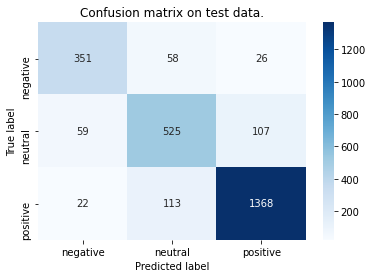

In [ ]:
# VNCoreNLP tách từ
!pip install deplacy vncorenlp
!test -d VnCoreNLP || git clone --depth=1 https://github.com/vncorenlp/VnCoreNLP
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar",annotators="wseg")
def vncore_tokenize(document):
    l = vncorenlp.tokenize(document)[0]
    document = ''
    for i in range(len(l)):
        document += l[i] + ' '
    document = document[:-1]
    return document

def text_preprocessing(X):
    for i in range(len(X)):
        X[i] = vncore_tokenize(X[i])
    return X

X_train = text_preprocessing(X_train)
X_dev = text_preprocessing(X_dev)
X_test = text_preprocessing(X_test)

# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('vinai/phobert-base', num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

# encoding du lieu
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
dev_encodings = tokenizer(list(X_dev), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Chuan bi data
train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

# Chuan bi mo hinh
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

# Huấn luyện mô hình
trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

y_train_pred = np.argmax(train_dataset_pred.predictions, axis=-1)
y_dev_pred = np.argmax(dev_dataset_pred.predictions, axis=-1)
y_test_pred = np.argmax(test_dataset_pred.predictions, axis=-1)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
cm = confusion_matrix(y_test_true, y_test_pred)
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)
list_labels = ['negative', 'neutral', 'positive']
sb.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 10}, 
           xticklabels = list_labels, yticklabels = list_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on test data.')
plt.show()

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/APD_Not_Process/Tail'
result.to_csv(path + '/' + 'phoBert.csv', index=False)
result.head()

# Lưu record
df = pd.DataFrame({"Model": [model_name[13]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/APD_Not_Process/Tail/APD_Not_Process_tail.csv",
          index = None, header = False, mode = 'a')